- CaseCadeClassifier
- opencv에서 제공하는 이미지 검출용 분류알고리즘
- 어떤것을 검출할지에 대한 데이터가 담긴 casecade 파일을 지정하여 원하는 대상을 검출할 수 있는 알고리즘
- 검출 대상이 달라진다고 해서 코드가 달라지는 부분은 거의 없으며 검출 대상에 맞는 casecade 파일을 지정하면 된다

In [1]:
import cv2
import sys
import matplotlib.pyplot as plt

In [2]:
# 이미지 파일
# image_file = 'photo/face1.jpg'
# image_file = 'photo/face2.jpg'
image_file = 'photo/avengers.jpg'

In [3]:
# casecade 파일 지정
# 검출하고자 하는 대상에 대한 casecade파일 복사해준다.
# C:\opencv\build\etc
casecade_file = 'haarcascade_frontalface_alt.xml'

In [4]:
# Casecase Classifier 생성
model = cv2.CascadeClassifier(casecade_file)

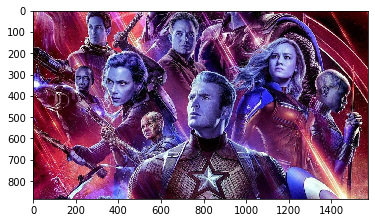

In [5]:
# 이미지를 불러온다.
image = cv2.imread(image_file)
plt.imshow(image)
plt.show()

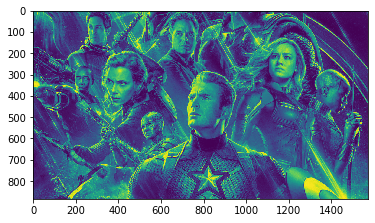

In [6]:
# 검출 효과를 높히기위하 한가지 색상형태로 변환한다(그레이스케일)
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gs)
plt.show()

In [7]:
# 얼굴 인식을 시작한다.
# minSize : 얼굴을 찾기 위한 최소 영역의 크기
# minNeighbors : 최소 이웃 색상의 수. 낮을 수록 정밀하게 탐색한다.
face_list = model.detectMultiScale(image_gs, minSize=(100, 100),minNeighbors=1)
face_list

array([[ 232,   36,  117,  117],
       [1089,  160,  147,  147],
       [ 174,  273,  115,  115],
       [ 638,   58,  141,  141],
       [ 296,  271,  184,  184],
       [ 674,  332,  197,  197]], dtype=int32)

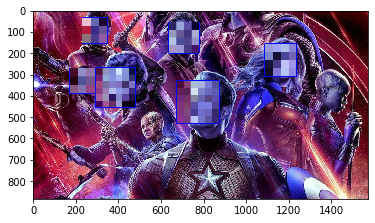

In [8]:
# 찾을 얼굴이 있다면..
if len(face_list) > 0 :
    # 영역 색상
    color = (0, 0, 255)
    # 얼굴의 수만큼 반복한다.
    for face in face_list : 
        # 영역값을 추출한다.
        x, y, w, h = face
        # 네모를 그린다.
        cv2.rectangle(image, (x, y), (x+w, y+w), color, thickness=8)
        
        # 모자이크 처리
        # 얼굴 영역의 이미지를 가져온다.
        face_img = image[y:y+h, x:x+w]
        # 자른이미지를 축소한다.
        face_img = cv2.resize(face_img, (w // 30, h // 30))
        # 원래 크기로 확대한다.
        face_img = cv2.resize(face_img, (w, h), interpolation=cv2.INTER_AREA)
        # 원래 얼굴 위치에 덮어준다.
        image[y:y+h, x:x+w] = face_img
        
    plt.imshow(image)
    plt.show()
    # 이미지를 파일로 저장한다.
    cv2.imwrite('cv2_result.png', image)